[11- Preprocessing audio data for Deep Learning](https://www.youtube.com/watch?v=Oa_d-zaUti8)


In [27]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [28]:
!wget https://www2.cs.uic.edu/~i101/SoundFiles/CantinaBand60.wav
# get .wav file for code below
# the song file
file = "CantinaBand60.wav" 

--2023-06-06 05:04:42--  https://www2.cs.uic.edu/~i101/SoundFiles/CantinaBand60.wav
Resolving www2.cs.uic.edu (www2.cs.uic.edu)... 131.193.32.16
Connecting to www2.cs.uic.edu (www2.cs.uic.edu)|131.193.32.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2646044 (2.5M) [audio/x-wav]
Saving to: ‘CantinaBand60.wav.1’

CantinaBand60.wav.1 100%[===================>]   2.52M  6.82MB/s    in 0.4s    

2023-06-06 05:04:43 (6.82 MB/s) - ‘CantinaBand60.wav.1’ saved [2646044/2646044]



<function matplotlib.pyplot.show(close=None, block=None)>

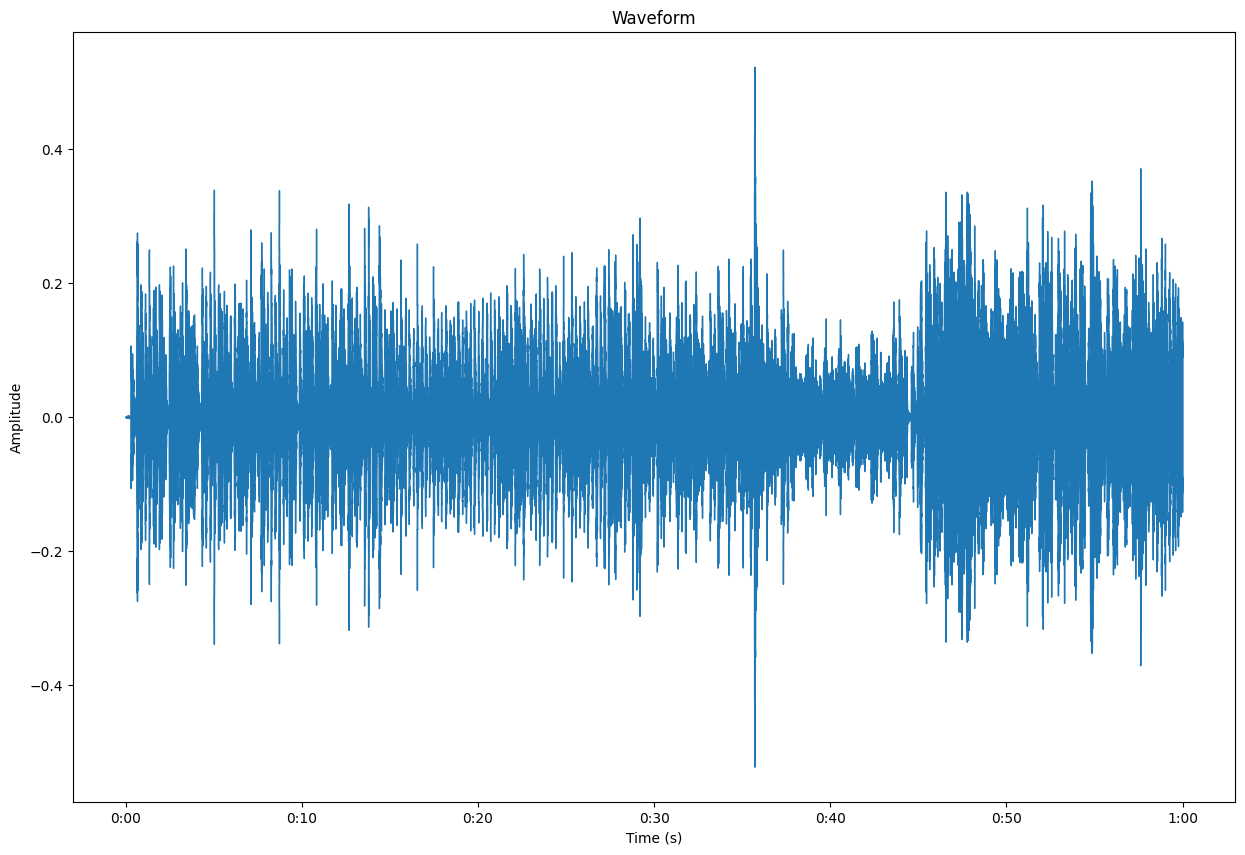

In [29]:
FIG_SIZE = (15,10) 

# load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)

# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sr=sample_rate)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

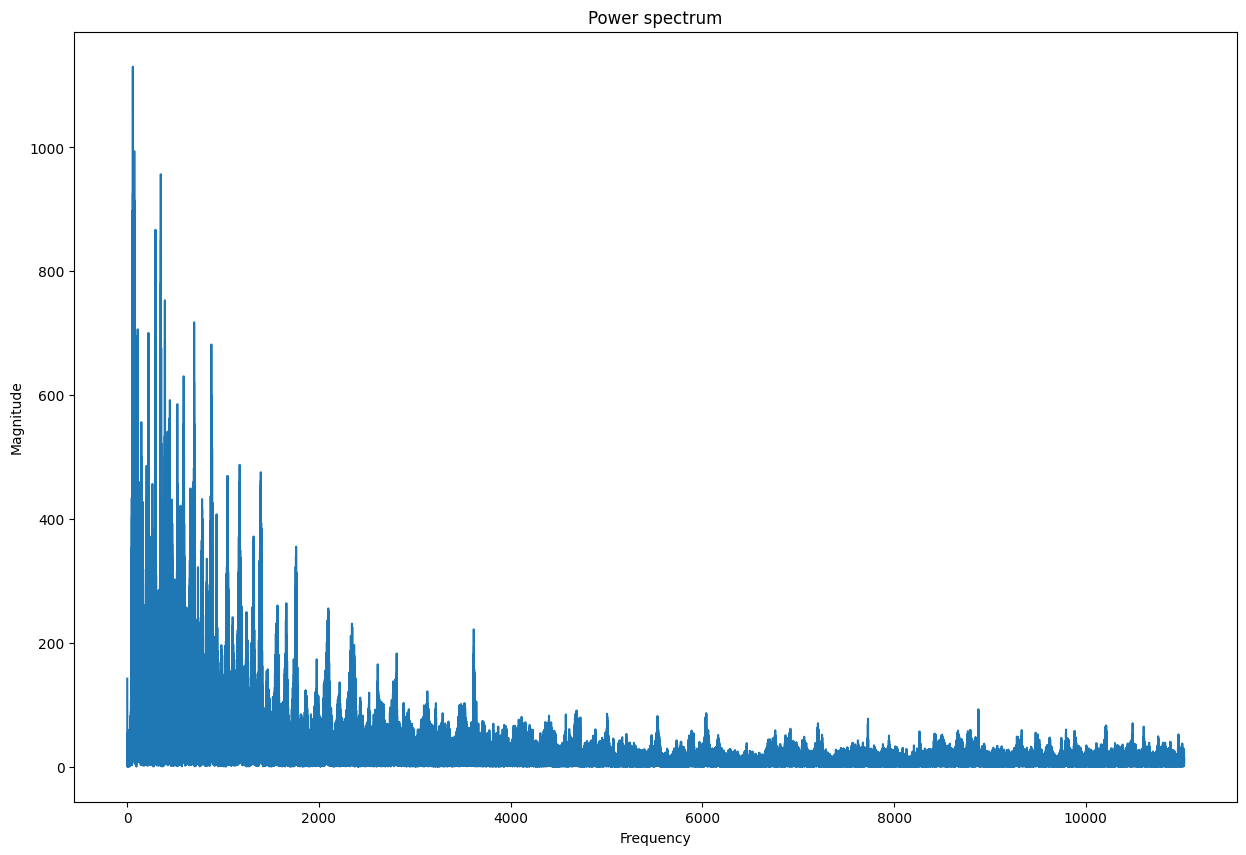

In [30]:
# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)  # output numpy array 1D that has as many values as total samples

# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft) # this is the magnitude

# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
# will show mostly showing in the lower frequencies that appear for this song
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")
plt.show

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


<function matplotlib.pyplot.show(close=None, block=None)>

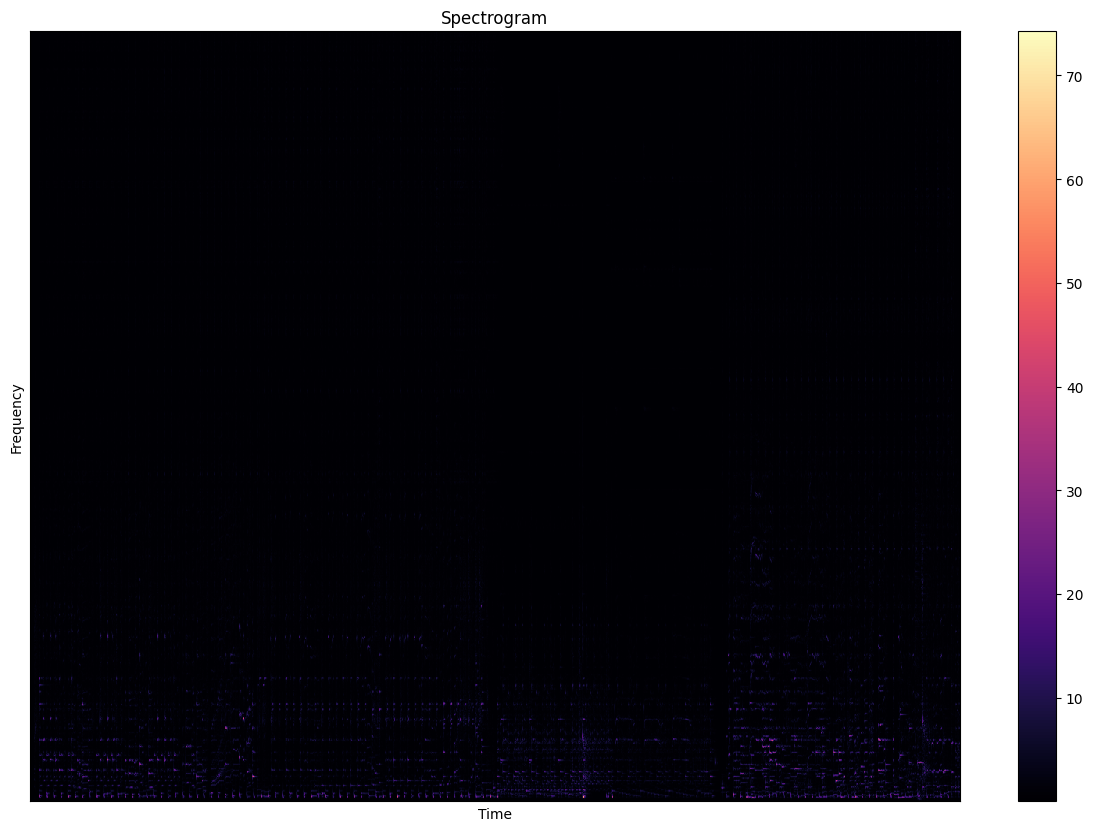

In [31]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

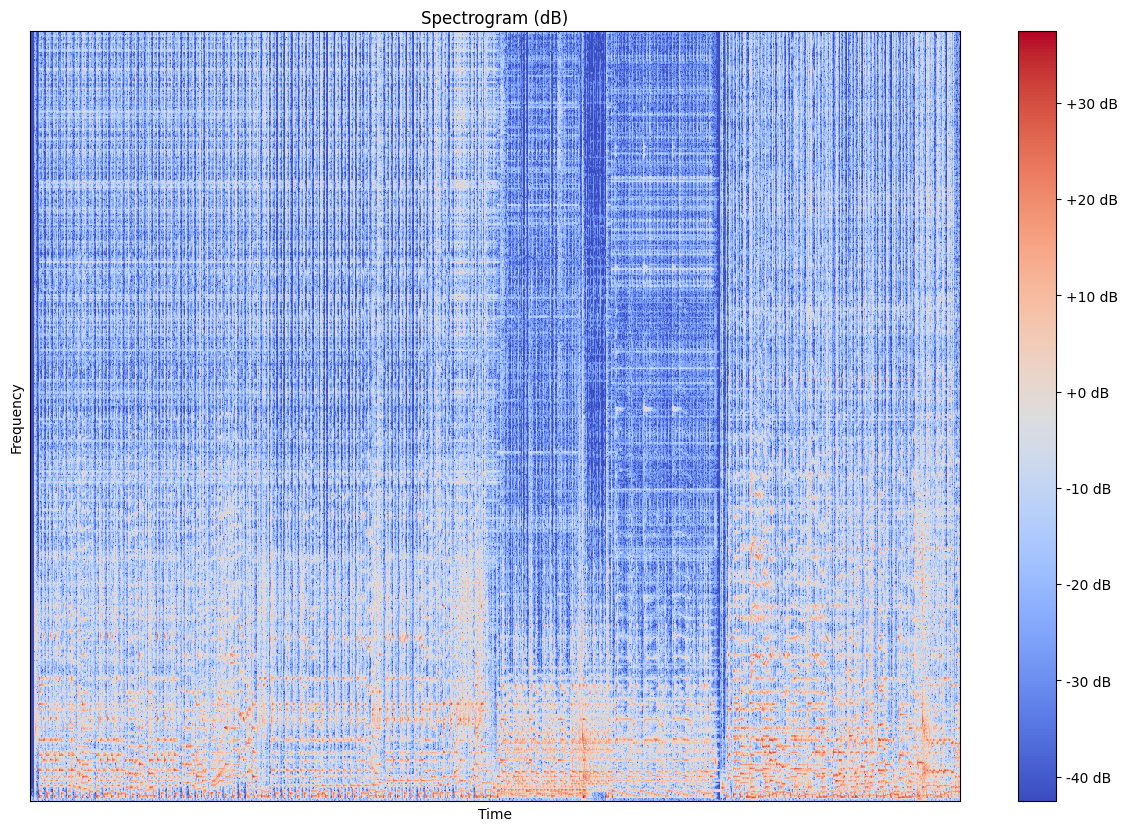

In [32]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.show

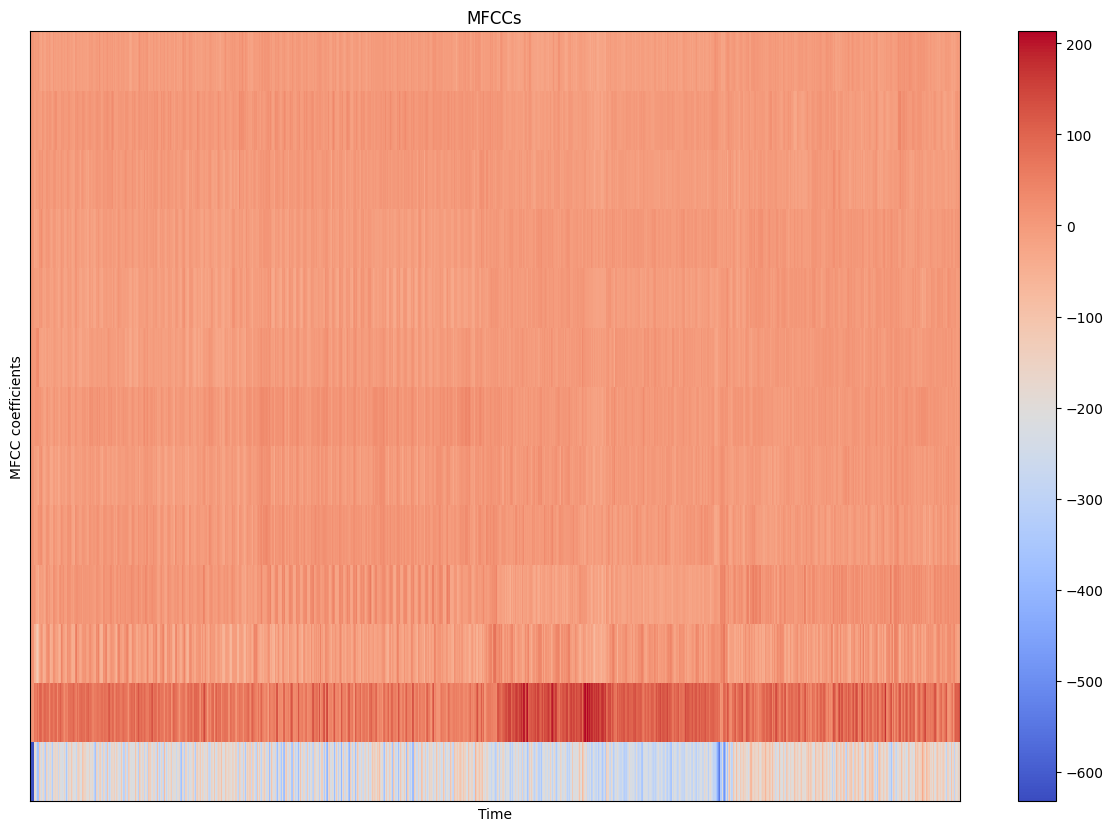

In [26]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()